# EDA

# Importing Libraries

In [ ]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import numpy as np
import matplotlib.pyplot as plt #visualization
import seaborn as sns  #visualization
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.models import load_model

from datetime import datetime, date
import math
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize': (20,15)})

### Reading File

In [ ]:
df = pd.read_csv('Aquifer_Petrignano.csv')
df.tail(50)

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
5173,12/05/2020,0.6,-24.93,-24.67,19.5,19.1,-21586.176,2.4
5174,13/05/2020,0.0,-24.95,-24.66,20.6,20.0,-22310.208,2.5
5175,14/05/2020,0.0,-25.06,-24.68,23.4,22.5,-22894.272,2.4
5176,15/05/2020,0.0,-25.05,-24.73,19.9,19.6,-23233.824,2.4
5177,16/05/2020,0.8,-25.02,-24.72,17.4,17.5,-22360.320,2.4
5178,17/05/2020,0.0,-24.90,-24.66,23.5,23.4,-21607.776,2.4
5179,18/05/2020,0.0,-24.99,-24.68,19.9,19.9,-23195.808,2.4
5180,19/05/2020,10.8,-24.93,-24.65,20.6,20.4,-22284.288,2.4
5181,20/05/2020,10.6,-24.77,-24.58,16.1,15.7,-19410.624,2.6
5182,21/05/2020,0.0,-25.04,-24.72,19.0,18.4,-25564.032,2.7


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rainfall_Bastia_Umbra,4199.0,1.556633,5.217923,0.000,0.00,0.00,0.10,67.30
Depth_to_Groundwater_P24,5168.0,-26.263723,3.319858,-34.470,-28.25,-25.99,-23.82,-19.66
Depth_to_Groundwater_P25,5184.0,-25.692926,3.214165,-33.710,-27.62,-25.54,-23.43,-19.10
Temperature_Bastia_Umbra,4199.0,15.030293,7.794871,-3.700,8.80,14.70,21.40,33.00
Temperature_Petrignano,4199.0,13.739081,7.701369,-4.200,7.70,13.50,20.00,31.10
Volume_C10_Petrignano,5025.0,-29043.296726,4751.864371,-45544.896,-31678.56,-28689.12,-26218.08,0.00
Hydrometry_Fiume_Chiascio_Petrignano,4199.0,2.372517,0.589088,0.000,2.10,2.40,2.70,4.10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  5223 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P24              5168 non-null   float64
 3   Depth_to_Groundwater_P25              5184 non-null   float64
 4   Temperature_Bastia_Umbra              4199 non-null   float64
 5   Temperature_Petrignano                4199 non-null   float64
 6   Volume_C10_Petrignano                 5025 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7), object(1)
memory usage: 326.6+ KB


### Cleaning

In [ ]:
# Remove NA values
df = df[df['Rainfall_Bastia_Umbra'].notna()].reset_index(drop = True)
# remove columns that are not usefull
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'],axis = 1)


In [ ]:
# change column names
df.columns = ['date', 'rainfall', 'depth_to_groundwater', 'temperature', 'drainage_volume', 'river_hydrometry']

In [ ]:
# Convert date to datatime object
df['date']= pd.to_datetime(df['date'], format = '%d/%m/%Y')

In [ ]:
# Assign the output and also the input features
target = df['depth_to_groundwater']
features = df.drop('depth_to_groundwater',axis = 1)

#### Visualization

<Axes: xlabel='drainage_volume', ylabel='depth_to_groundwater'>

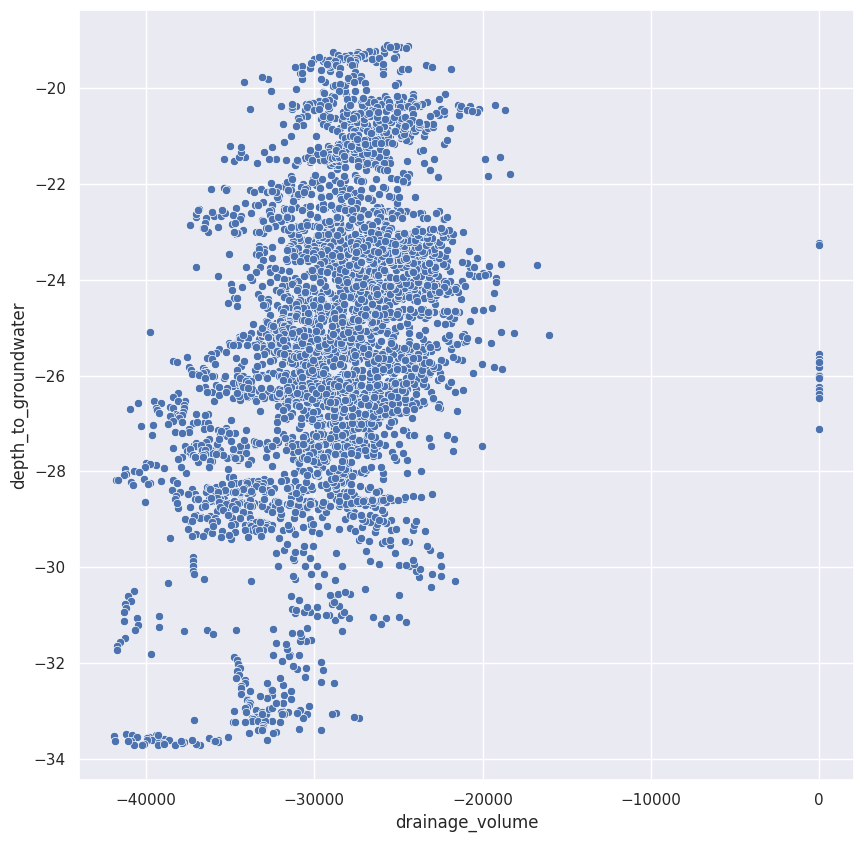

In [ ]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'drainage_volume', y = 'depth_to_groundwater', data = df)

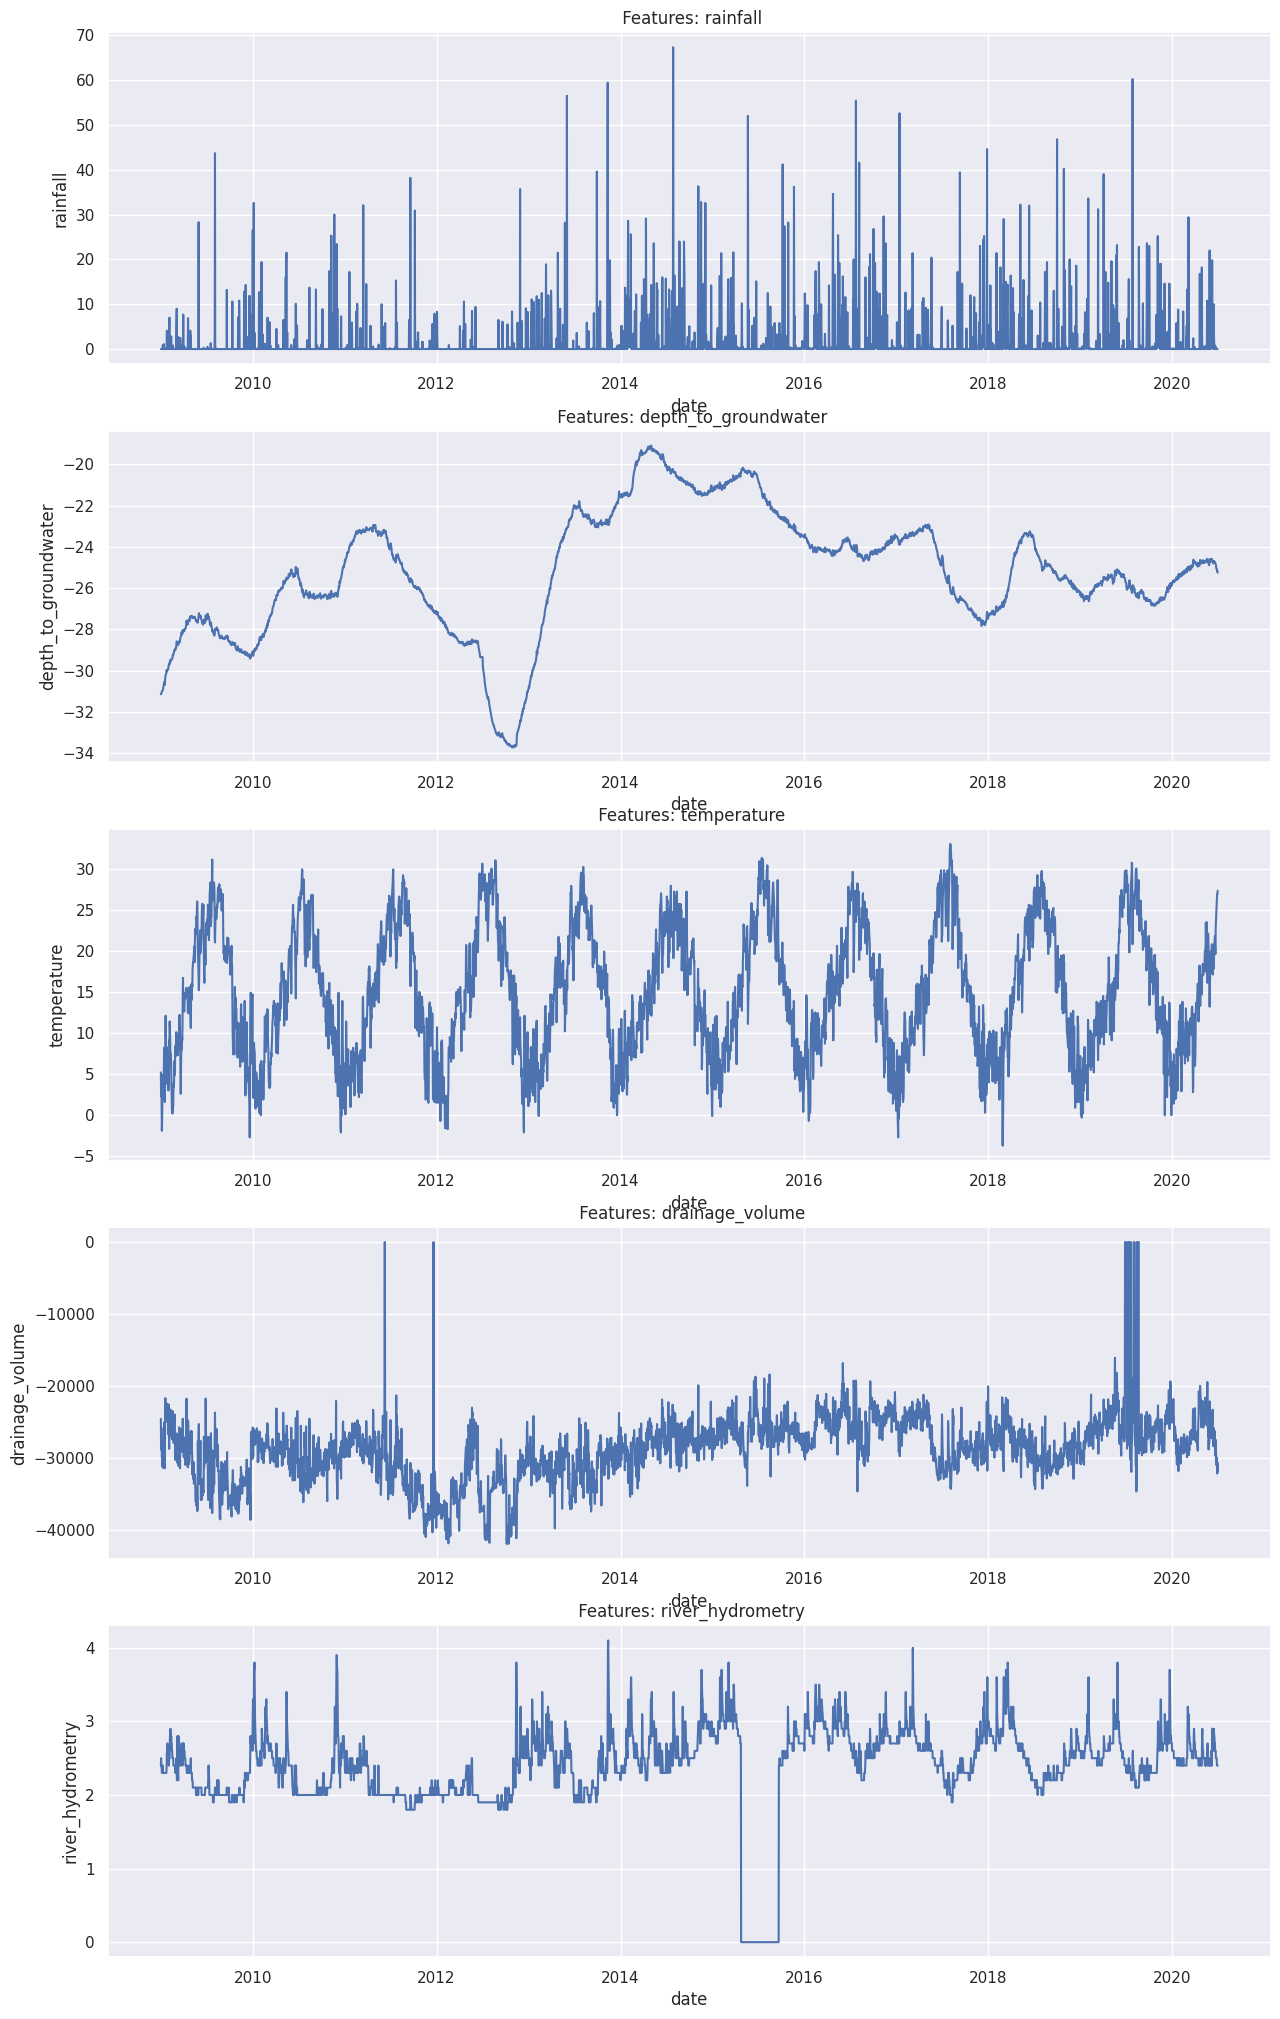

In [ ]:
## See how the features (rainfall,temperature etc.) change with date
f,ax = plt.subplots(nrows = 5, ncols = 1, figsize = (15,25))

for i, column in enumerate(df.drop('date',axis = 1).columns):

    sns.lineplot(x = df['date'], y = df[column].fillna(method = 'ffill'), ax = ax[i])

    ax[i].set_title(f' Features: {column}')



In [ ]:
# Interpolate missing values
df['depth_to_groundwater'] = df['depth_to_groundwater'].interpolate()
df['drainage_volume'] = df['drainage_volume'].interpolate()


In [ ]:
df.isnull().sum()

,0
date,0
rainfall,0
depth_to_groundwater,0
temperature,0
drainage_volume,0
river_hydrometry,0


<Axes: >

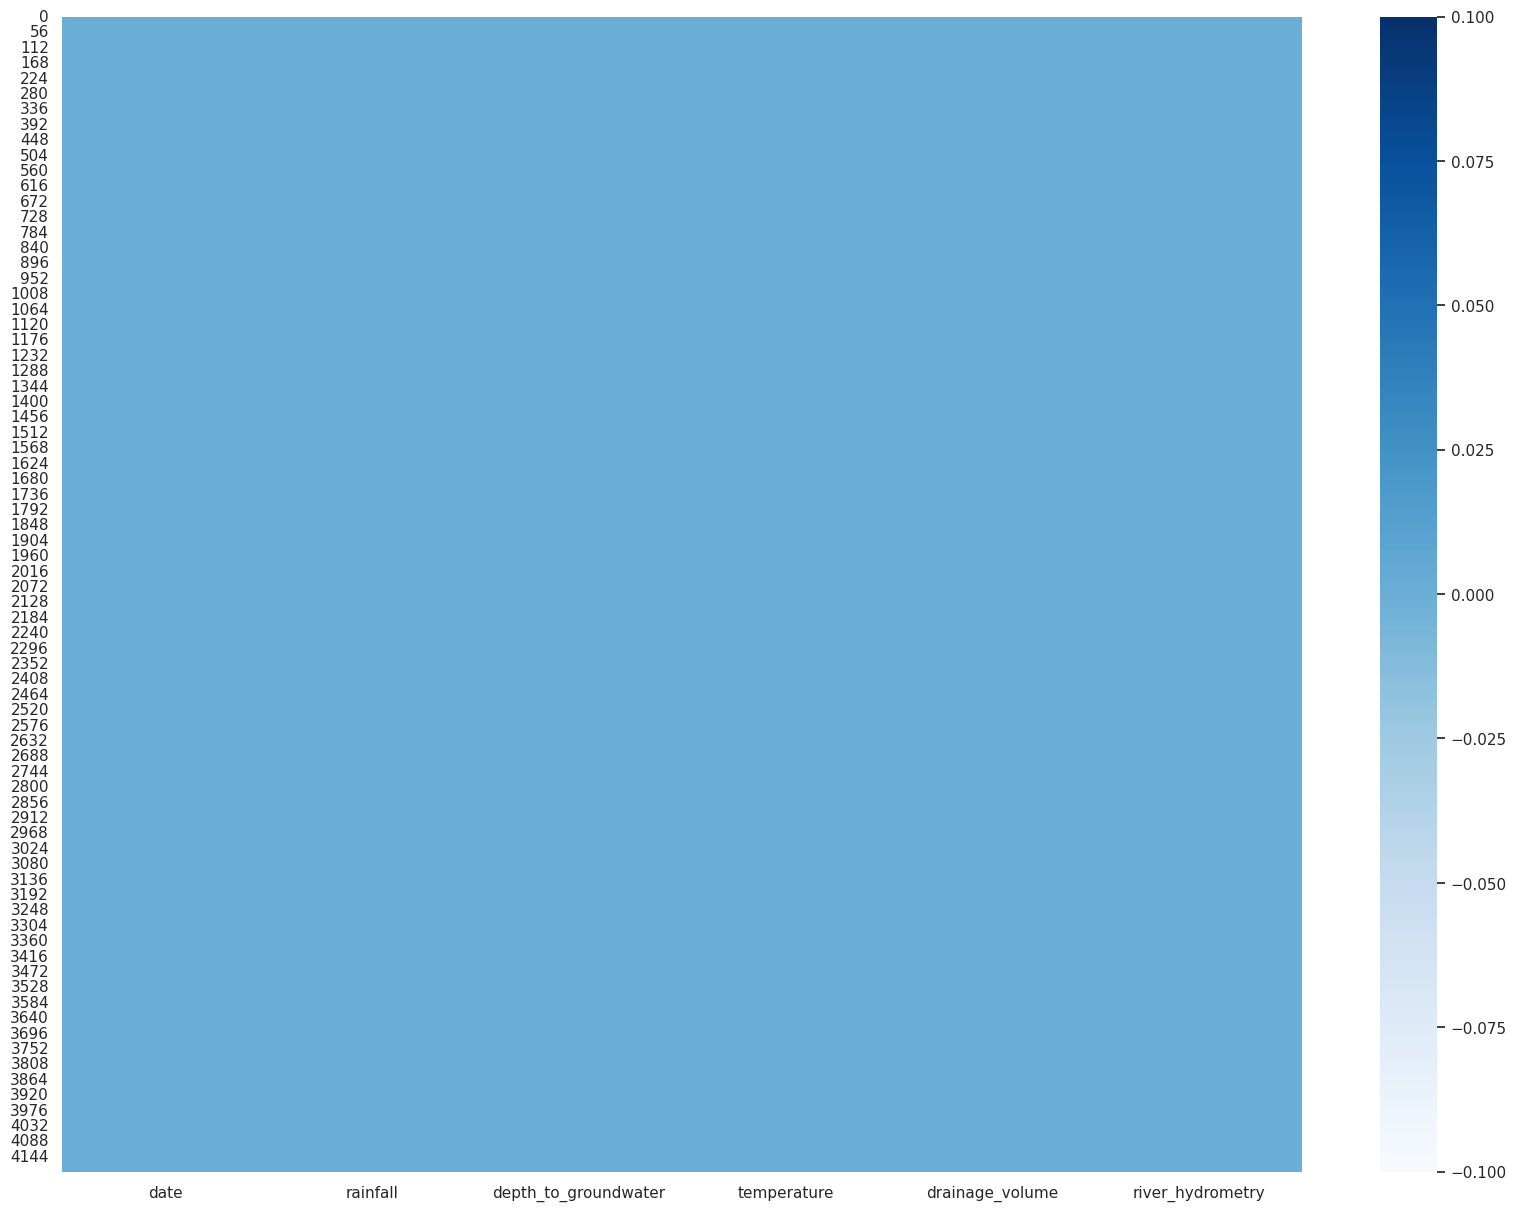

In [ ]:
sns.heatmap(df.isna(), cmap = 'Blues')

#### important step while dealing with timeseries is that, it has to be in chronological order and also equidistant whatever the interval chosen

In [ ]:
# sort df by date and check if its equidistant
df = df.sort_values(by = 'date')

df['Delta'] = df['date'] - df['date'].shift(1)
df['Delta'].value_counts()

,count
Delta,
1 days,4198


In [ ]:
# To get rid of the null values, interpolate the values

df['drainage_volume'] = df['drainage_volume'].interpolate()
df['river_hydrometry'] = df['river_hydrometry'].interpolate()
df['depth_to_groundwater'] = df['depth_to_groundwater'].interpolate()

### Resampling

In [ ]:
df.head()

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry,Delta
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4,NaT
1,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5,1 days
2,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4,1 days
3,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4,1 days
4,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3,1 days


#### Visialization of different resampled data

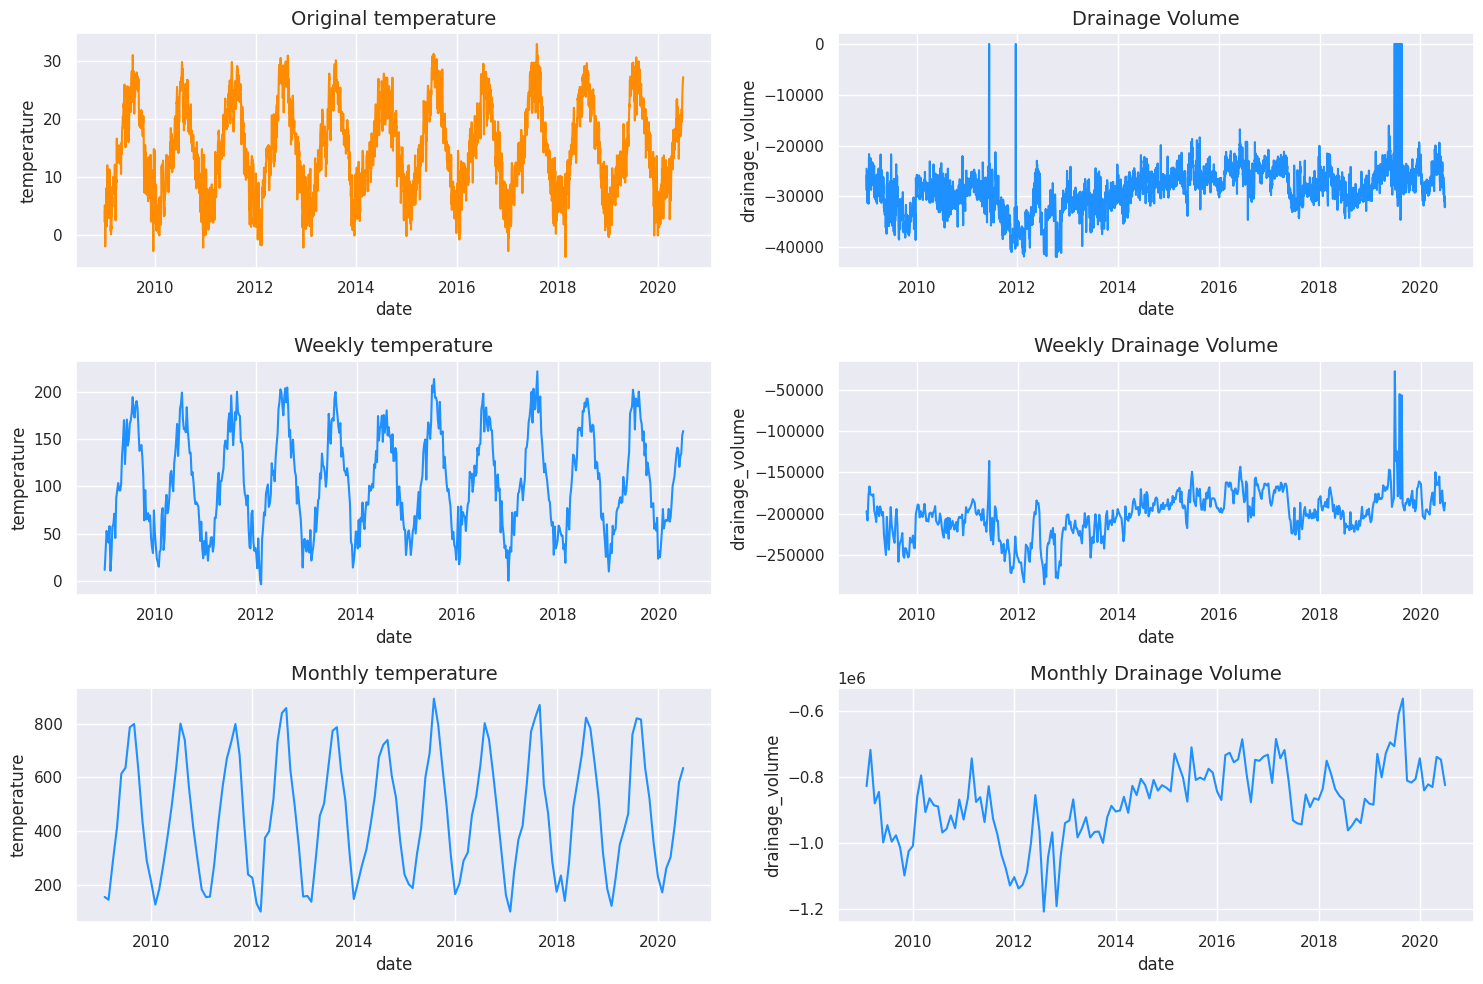

In [ ]:
f, ax = plt.subplots(3, 2, figsize=(15, 10))

# Plot original temperature
sns.lineplot(x=df['date'], y=df['temperature'], ax=ax[0, 0], color='darkorange')
ax[0, 0].set_title("Original temperature", fontsize=14)

# Plot weekly temperature
resampled_temp = df[['date', 'temperature']].resample('7D', on='date').sum().reset_index(drop=False)
sns.lineplot(x=resampled_temp['date'], y=resampled_temp['temperature'], ax=ax[1, 0], color='dodgerblue')
ax[1, 0].set_title("Weekly temperature", fontsize=14)

# Plot monthly temperature
resampled_tempM = df[['date', 'temperature']].resample('M', on='date').sum().reset_index(drop=False)
sns.lineplot(x=resampled_tempM['date'], y=resampled_tempM['temperature'], ax=ax[2, 0], color='dodgerblue')
ax[2, 0].set_title("Monthly temperature", fontsize=14)

# Plot original drainage volume
sns.lineplot(x=df['date'], y=df['drainage_volume'], color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Drainage Volume', fontsize=14)

# Plot weekly drainage volume
resampled_df = df[['date', 'drainage_volume']].resample('7D', on='date').sum().reset_index(drop=False)
sns.lineplot(x=resampled_df['date'], y=resampled_df['drainage_volume'], color='dodgerblue', ax=ax[1, 1])
ax[1, 1].set_title('Weekly Drainage Volume', fontsize=14)

# Plot monthly drainage volume
resampled_df = df[['date', 'drainage_volume']].resample('M', on='date').sum().reset_index(drop=False)
sns.lineplot(x=resampled_df['date'], y=resampled_df['drainage_volume'], color='dodgerblue', ax=ax[2, 1])
ax[2, 1].set_title('Monthly Drainage Volume', fontsize=14)

plt.tight_layout()


In [ ]:
# Downsample
df_downsample = df[['date',
                 'depth_to_groundwater',
                 'temperature',
                 'drainage_volume',
                 'river_hydrometry',
                 'rainfall']].resample('7D', on ='date').mean().reset_index(drop = False)

In [ ]:
df = df_downsample.copy()

#### Checking Stationarity

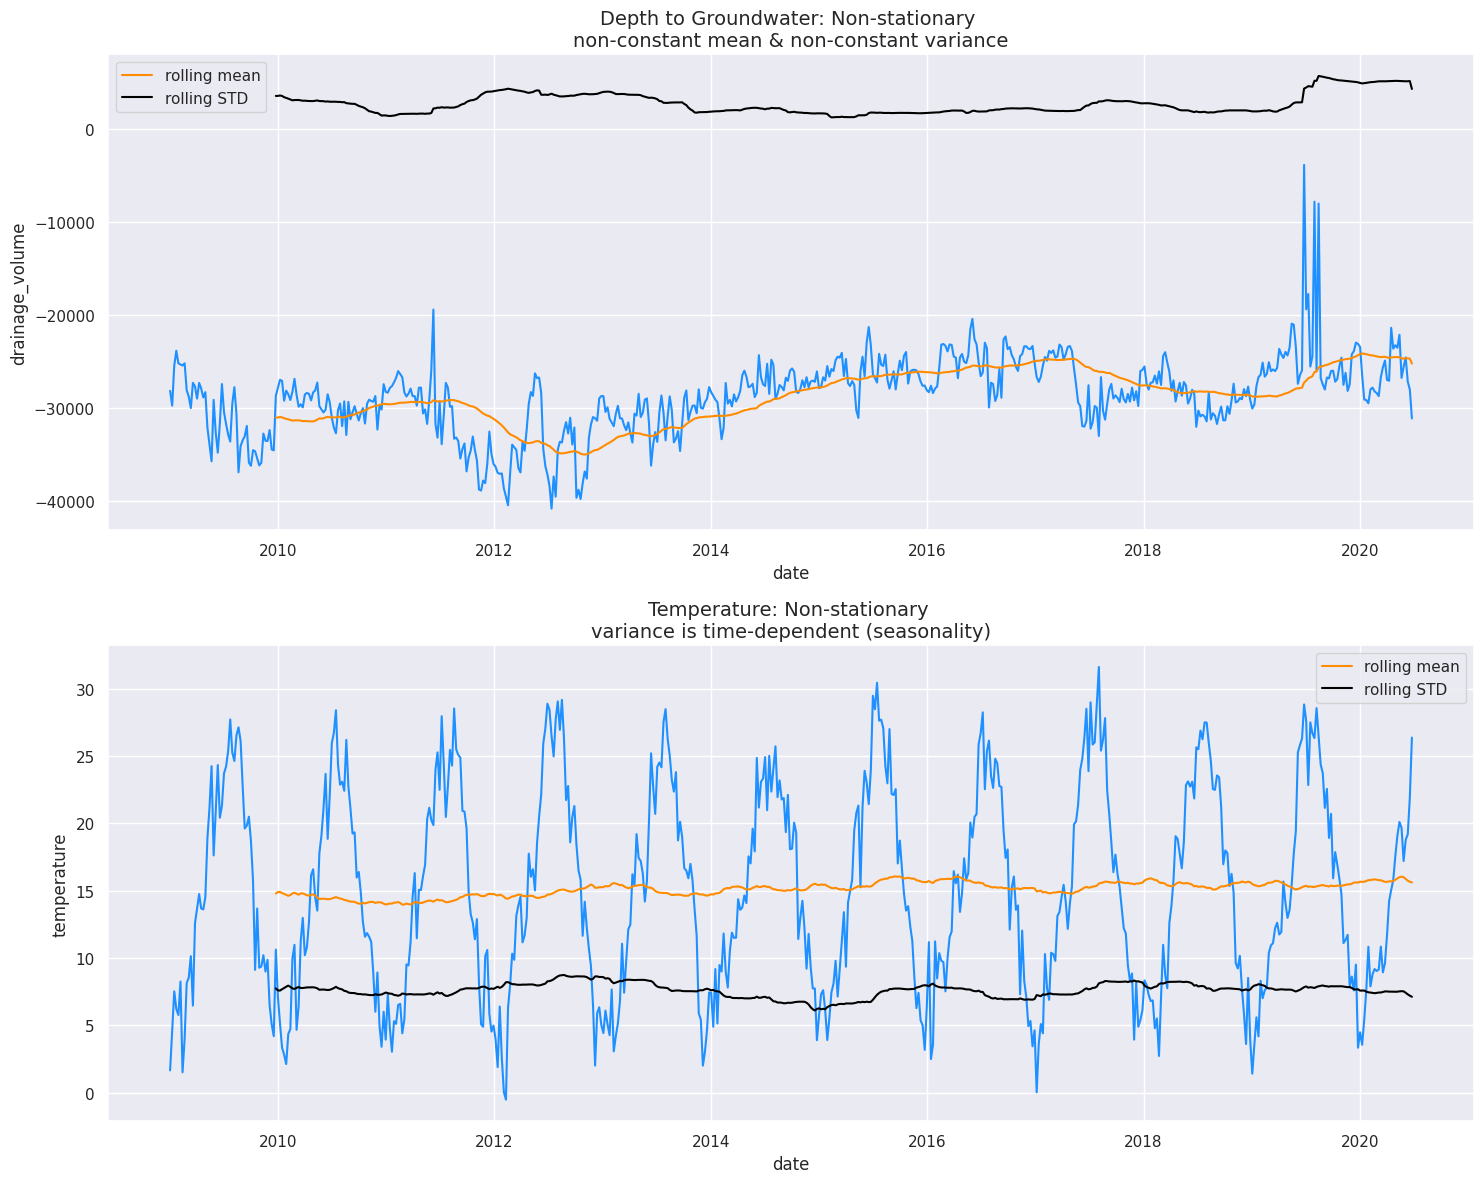

In [ ]:
## visually check to see if the mean and variance is constant (stationary)

rolling_window = 52 # there are 52 weeks in 1 year

f, ax = plt.subplots(2,1,figsize = (15,12))

sns.lineplot(x = df['date'], y = df['drainage_volume'], ax = ax[0], color = 'dodgerblue')
sns.lineplot(x = df['date'], y = df['drainage_volume'].rolling(rolling_window).mean(), ax = ax[0], color = 'darkorange', label = "rolling mean")
sns.lineplot(x = df['date'], y = df['drainage_volume'].rolling(rolling_window).std(), ax = ax[0], color = 'black', label = "rolling STD")
ax[0].set_title('Depth to Groundwater: Non-stationary \nnon-constant mean & non-constant variance',fontsize = 14)

sns.lineplot(x = df['date'], y = df['temperature'], ax = ax[1], color = 'dodgerblue')
sns.lineplot(x = df['date'], y = df['temperature'].rolling(rolling_window).mean(), ax = ax[1], color = 'darkorange',label = "rolling mean")
sns.lineplot(x = df['date'], y = df['temperature'].rolling(rolling_window).std(), ax = ax[1], color = 'black', label = "rolling STD")
ax[1].set_title('Temperature: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)

plt.tight_layout()
plt.show()

#### Adfuller Test

In [ ]:
result = adfuller(df['depth_to_groundwater'].values)
result

(-2.8802016493166605,
 0.047699190920208856,
 7,
 592,
 {'1%': -3.441444394224128,
  '5%': -2.8664345376276454,
  '10%': -2.569376663737217},
 -734.3154255877616)

#### Transformation

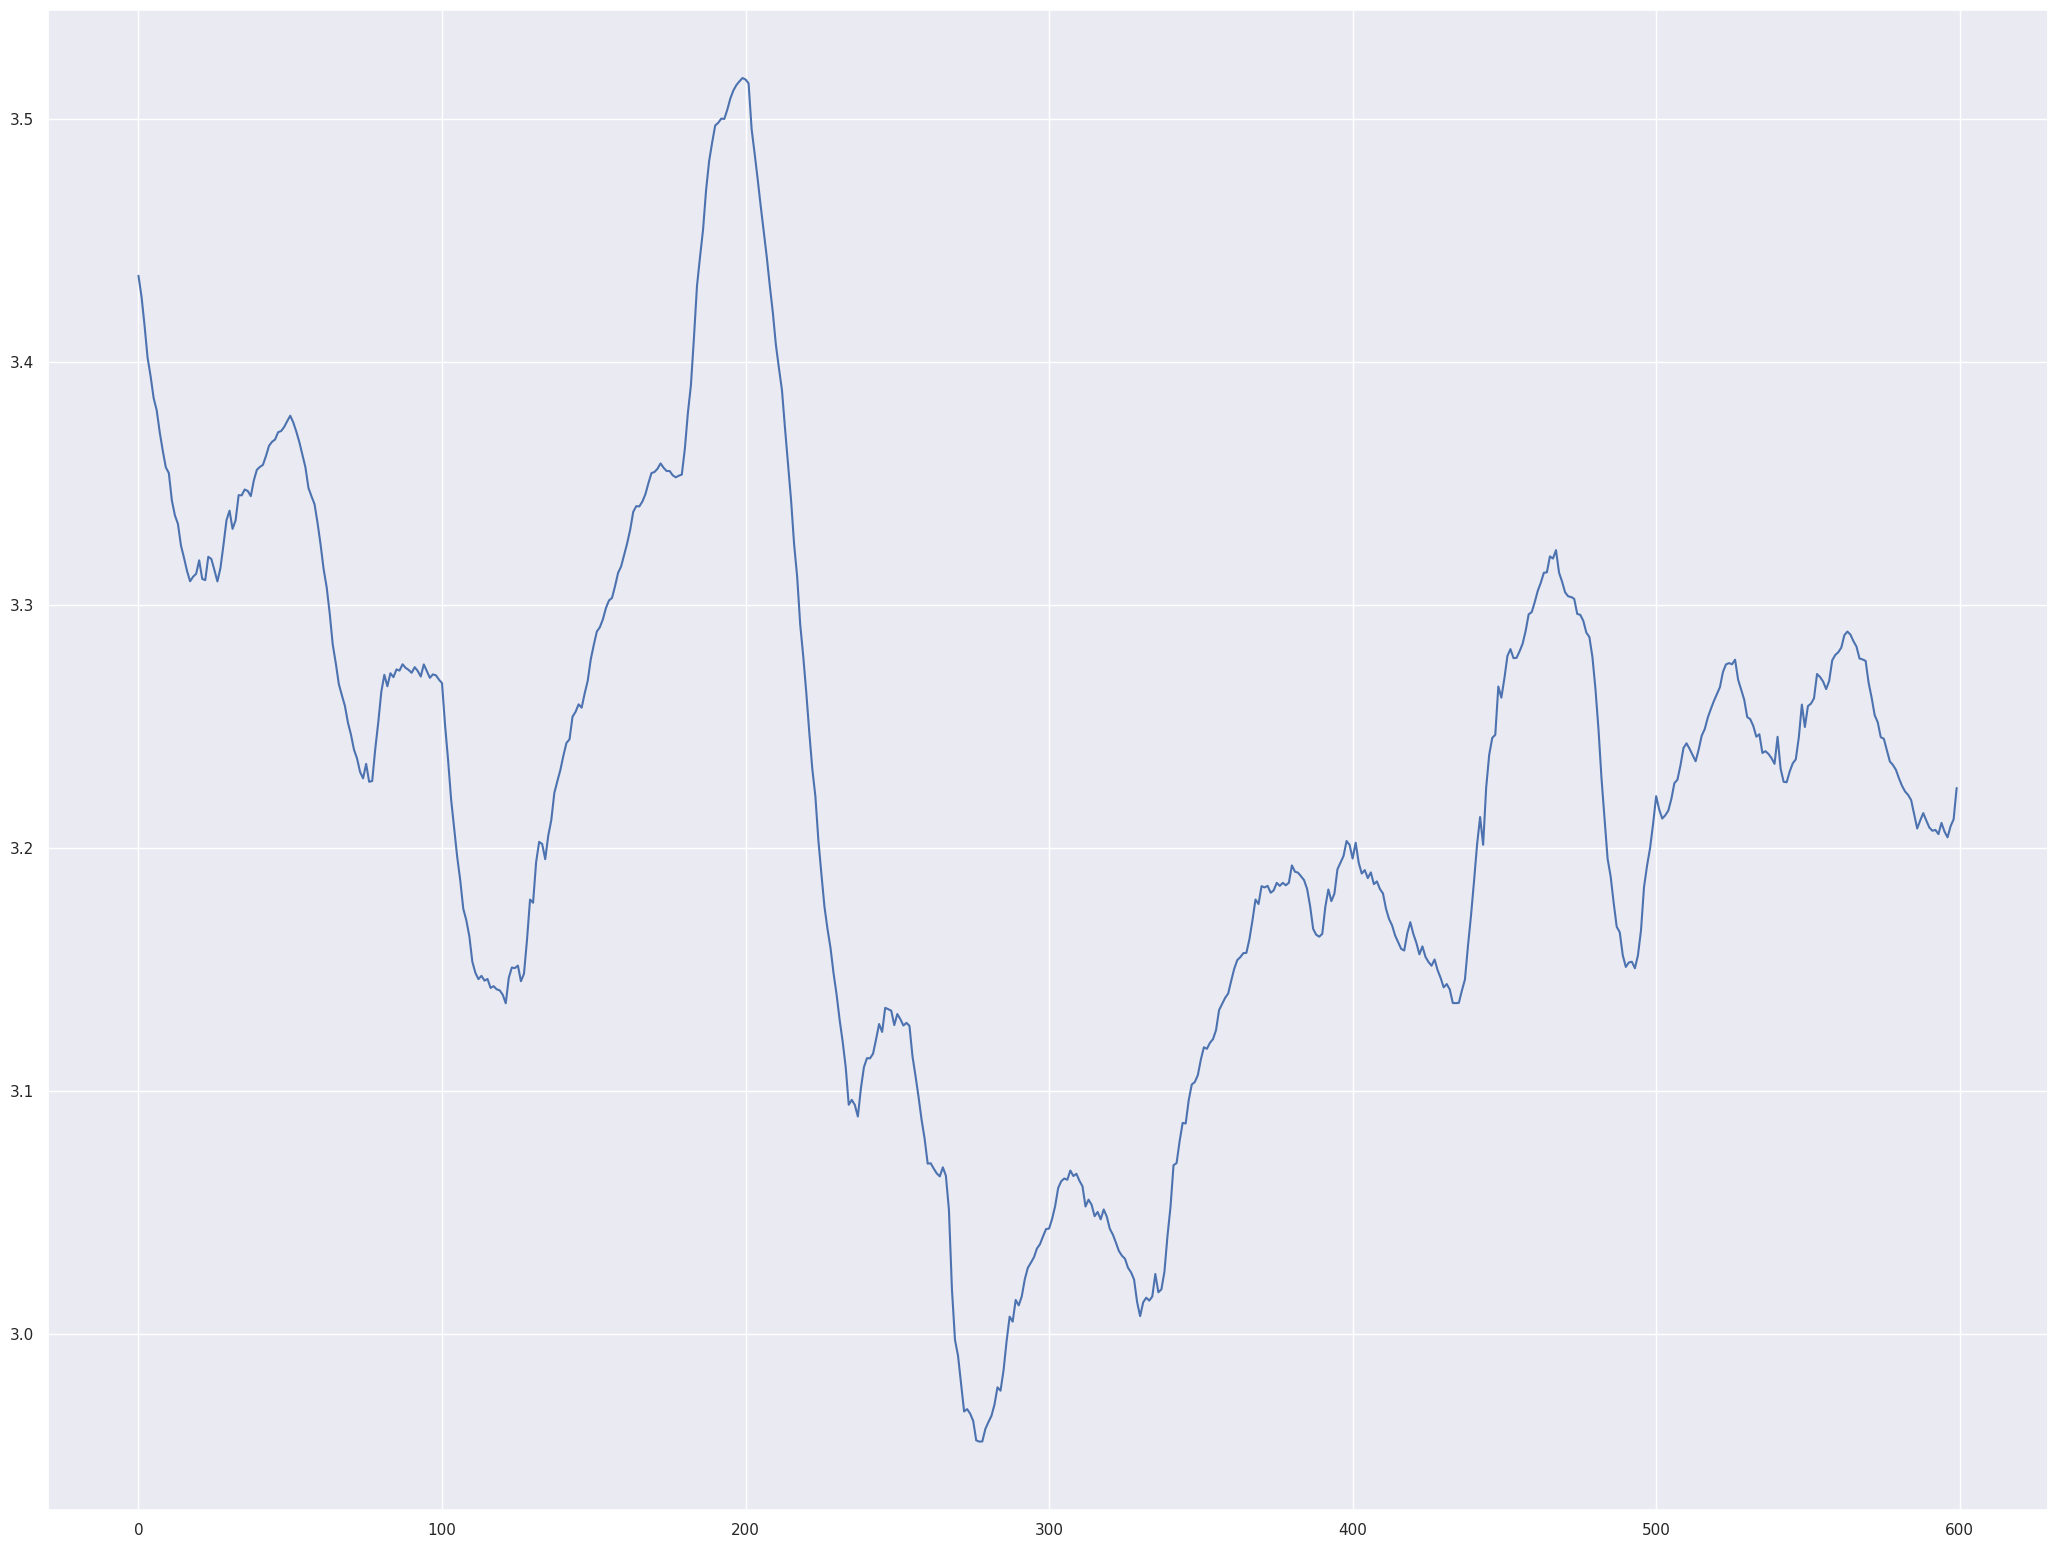

In [ ]:
df['depth_to_groundwater_log'] = np.log(abs(df['depth_to_groundwater']))
f = plt.figure()
axes = f.add_axes([1,1,1,1])
axes.plot(df['depth_to_groundwater_log'].values)
#sns.lineplot(x = df['date'], y = df['depth_to_groundwater_log'], ax = ax[1], color = 'darkorange')

## Feature Engineering

In [ ]:
# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract date-related features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_year'] = df['date'].dt.dayofyear
df['week_of_year'] = df['date'].dt.isocalendar().week  # ISO week
df['quarter'] = df['date'].dt.quarter
df['season'] = df['month'] % 12 // 3 + 1

# Handle missing values in 'week_of_year'
df['week_of_year'] = df['week_of_year'].fillna(0).astype(int)

# Display the updated DataFrame
df[['date', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()


,date,year,month,day,day_of_year,week_of_year,quarter,season
0,2009-01-01,2009,1,1,1,1,1,1
1,2009-01-08,2009,1,8,8,2,1,1
2,2009-01-15,2009,1,15,15,3,1,1
3,2009-01-22,2009,1,22,22,4,1,1
4,2009-01-29,2009,1,29,29,5,1,1


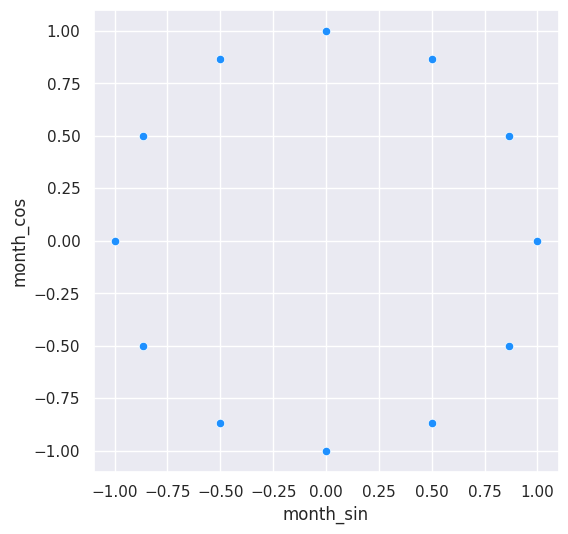

In [ ]:
month_in_year = 12
df['month_sin'] = np.sin(2*np.pi*df['month']/month_in_year)
df['month_cos'] = np.cos(2*np.pi*df['month']/month_in_year)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.scatterplot(x=df.month_sin, y=df.month_cos, color='dodgerblue')
plt.show()

## TimeSeries Decomposition

In [ ]:

core_columns = ['depth_to_groundwater', 'temperature', 'drainage_volume',
       'river_hydrometry', 'rainfall']

for column in core_columns:
    decomp = seasonal_decompose(df[column],model = 'additive',period = 52, extrapolate_trend = 'freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal


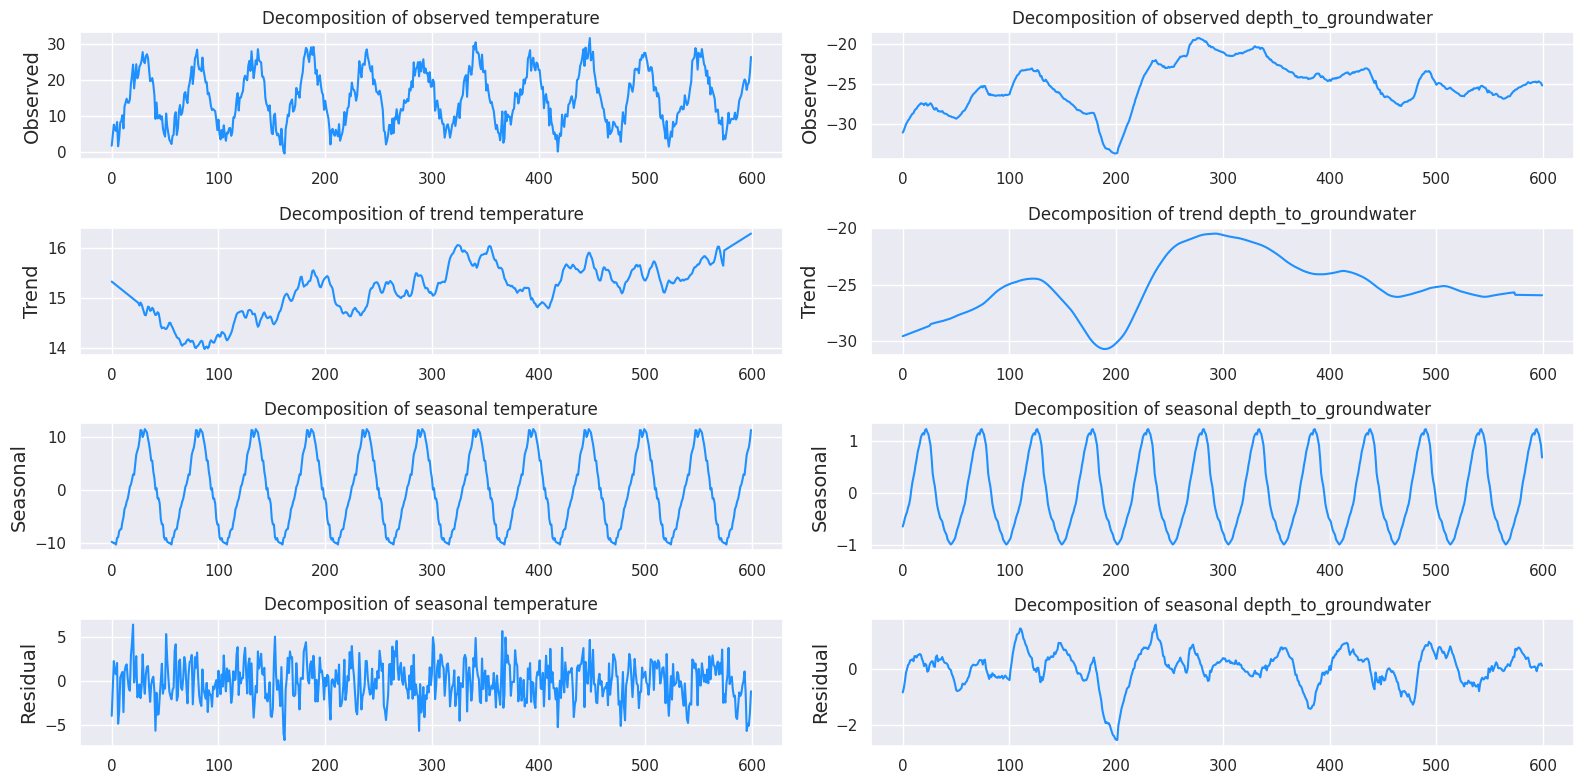

In [ ]:
f,ax = plt.subplots(nrows = 4, ncols = 2, figsize = (16,8))

for i, column in enumerate(['temperature','depth_to_groundwater']):

    res = seasonal_decompose(x = df[column], model = 'additive', period = 52, extrapolate_trend = 'freq')

    ax[0,i].set_title(f"Decomposition of observed {column}")
    res.observed.plot(ax = ax[0,i],color = 'dodgerblue',legend = False)
    ax[0,i].set_ylabel("Observed", fontsize = 14)

    ax[1,i].set_title(f"Decomposition of trend {column}")
    res.trend.plot(ax = ax[1,i],color = 'dodgerblue',legend = False)
    ax[1,i].set_ylabel("Trend", fontsize = 14)


    ax[2,i].set_title(f"Decomposition of seasonal {column}")
    res.seasonal.plot(ax = ax[2,i],color = 'dodgerblue',legend = False)
    ax[2,i].set_ylabel("Seasonal", fontsize = 14)

    ax[3,i].set_title(f"Decomposition of seasonal {column}")
    res.resid.plot(ax = ax[3,i],color = 'dodgerblue',legend = False)
    ax[3,i].set_ylabel("Residual", fontsize = 14)

plt.tight_layout()

In [ ]:
weeks_in_month = 4
df['temperature_seasonal_shift_b_2m'] = df['temperature_seasonal'].shift(-2 * weeks_in_month)

In [ ]:
# lag calculation, to see the correlation with each other

weeks_in_month = 4

for column in core_columns:
    df[f'{column}_seasonal_shift_b_2m'] = df[f'{column}_seasonal'].shift(-2 * weeks_in_month)
    df[f'{column}_seasonal_shift_b_1m'] = df[f'{column}_seasonal'].shift(-1 * weeks_in_month)
    df[f'{column}_seasonal_shift_1m'] = df[f'{column}_seasonal'].shift(1 * weeks_in_month)
    df[f'{column}_seasonal_shift_2m'] = df[f'{column}_seasonal'].shift(2 * weeks_in_month)
    df[f'{column}_seasonal_shift_3m'] = df[f'{column}_seasonal'].shift(3 * weeks_in_month)

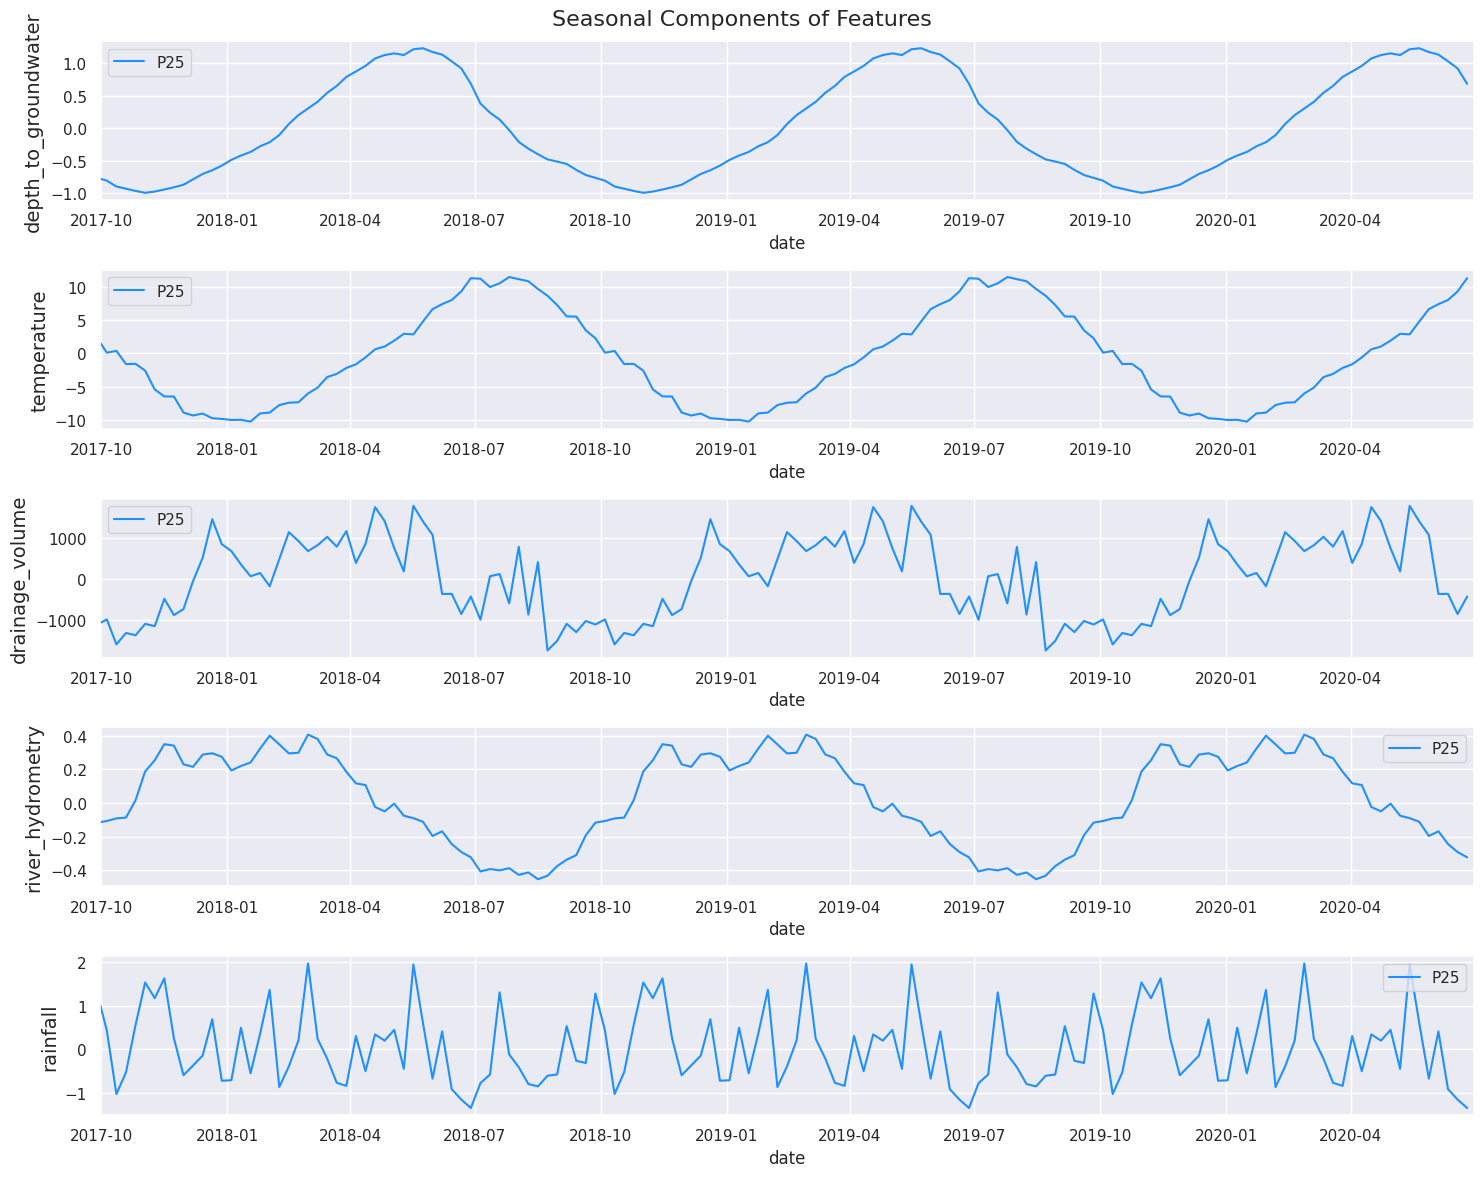

In [ ]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)

for i, column in enumerate(core_columns):
    sns.lineplot(x=df['date'], y=df[column + '_seasonal'], ax=ax[i], color='dodgerblue', label='P25')
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    ax[i].set_xlim([date(2017, 9, 30), date(2020, 6, 30)])

plt.tight_layout()
plt.show()

## Modelling

#### Split the data into Train and Test

In [ ]:
# dividing the dataframe into train and valididation

train_size = int(0.85*len(df))
test_size = len(df)- train_size

univariate_df = df[['date', 'depth_to_groundwater']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train,y_train = pd.DataFrame(univariate_df.iloc[:train_size,0]),pd.DataFrame(univariate_df.iloc[:train_size,1])
x_valid,y_valid = pd.DataFrame(univariate_df.iloc[train_size:,0]), pd.DataFrame(univariate_df.iloc[train_size:,1])

## LSTM Model

In [ ]:
dataset = univariate_df['y'].values.reshape(-1,1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [ ]:
train_size = int(len(dataset)*.67)
test_size = len(dataset)- train_size

train,test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(dataset),len(train),len(test))

600 402 198


600 402 198
Epoch 1/200
37/37 - 2s - 62ms/step - loss: 0.3650 - val_loss: 0.2395
Epoch 2/200
37/37 - 1s - 21ms/step - loss: 0.2865 - val_loss: 0.1683
Epoch 3/200
37/37 - 0s - 7ms/step - loss: 0.2049 - val_loss: 0.1023
Epoch 4/200
37/37 - 0s - 9ms/step - loss: 0.1341 - val_loss: 0.0546
Epoch 5/200
37/37 - 0s - 8ms/step - loss: 0.0842 - val_loss: 0.0285
Epoch 6/200
37/37 - 0s - 8ms/step - loss: 0.0561 - val_loss: 0.0167
Epoch 7/200
37/37 - 0s - 6ms/step - loss: 0.0421 - val_loss: 0.0124
Epoch 8/200
37/37 - 0s - 4ms/step - loss: 0.0351 - val_loss: 0.0109
Epoch 9/200
37/37 - 0s - 4ms/step - loss: 0.0317 - val_loss: 0.0103
Epoch 10/200
37/37 - 0s - 8ms/step - loss: 0.0300 - val_loss: 0.0103
Epoch 11/200
37/37 - 0s - 3ms/step - loss: 0.0290 - val_loss: 0.0106
Epoch 12/200
37/37 - 0s - 4ms/step - loss: 0.0283 - val_loss: 0.0107
Epoch 13/200
37/37 - 0s - 4ms/step - loss: 0.0277 - val_loss: 0.0109
Epoch 14/200
37/37 - 0s - 3ms/step - loss: 0.0272 - val_loss: 0.0104
Epoch 15/200
37/37 - 0s - 4ms

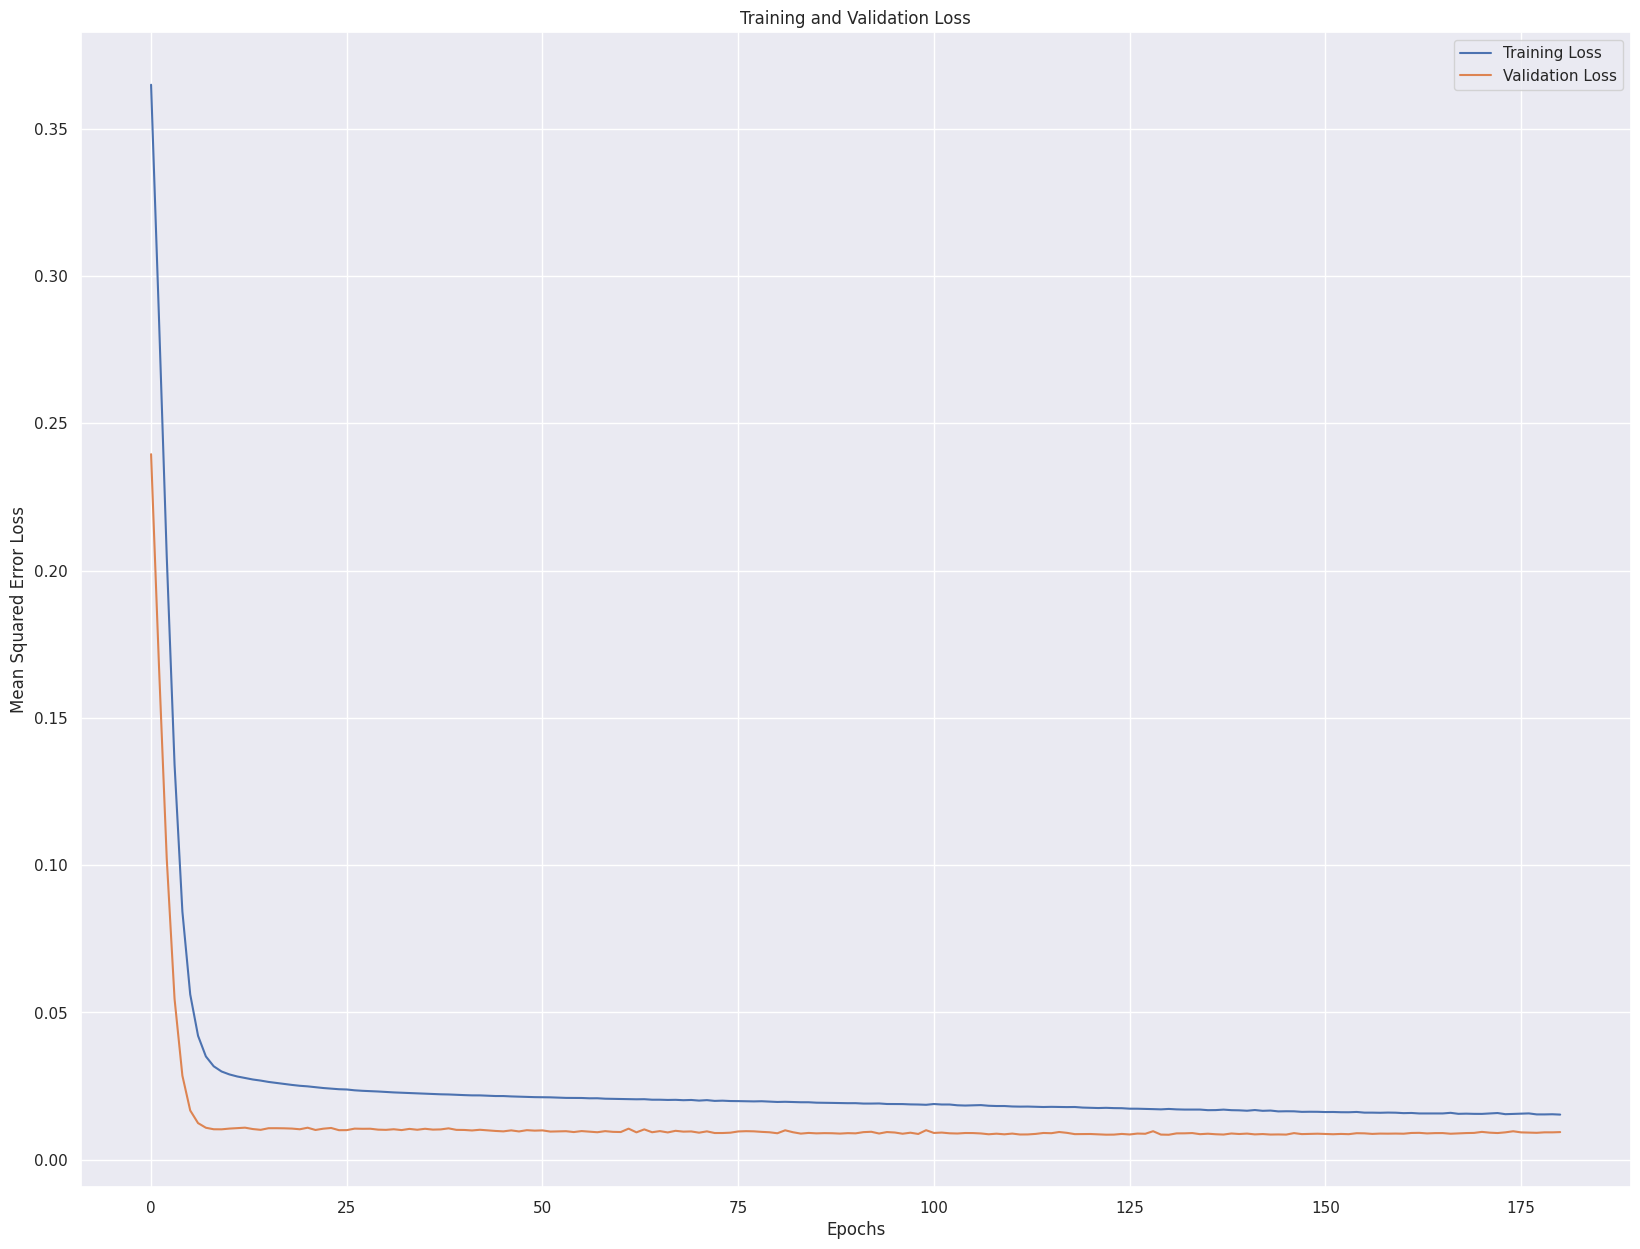

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


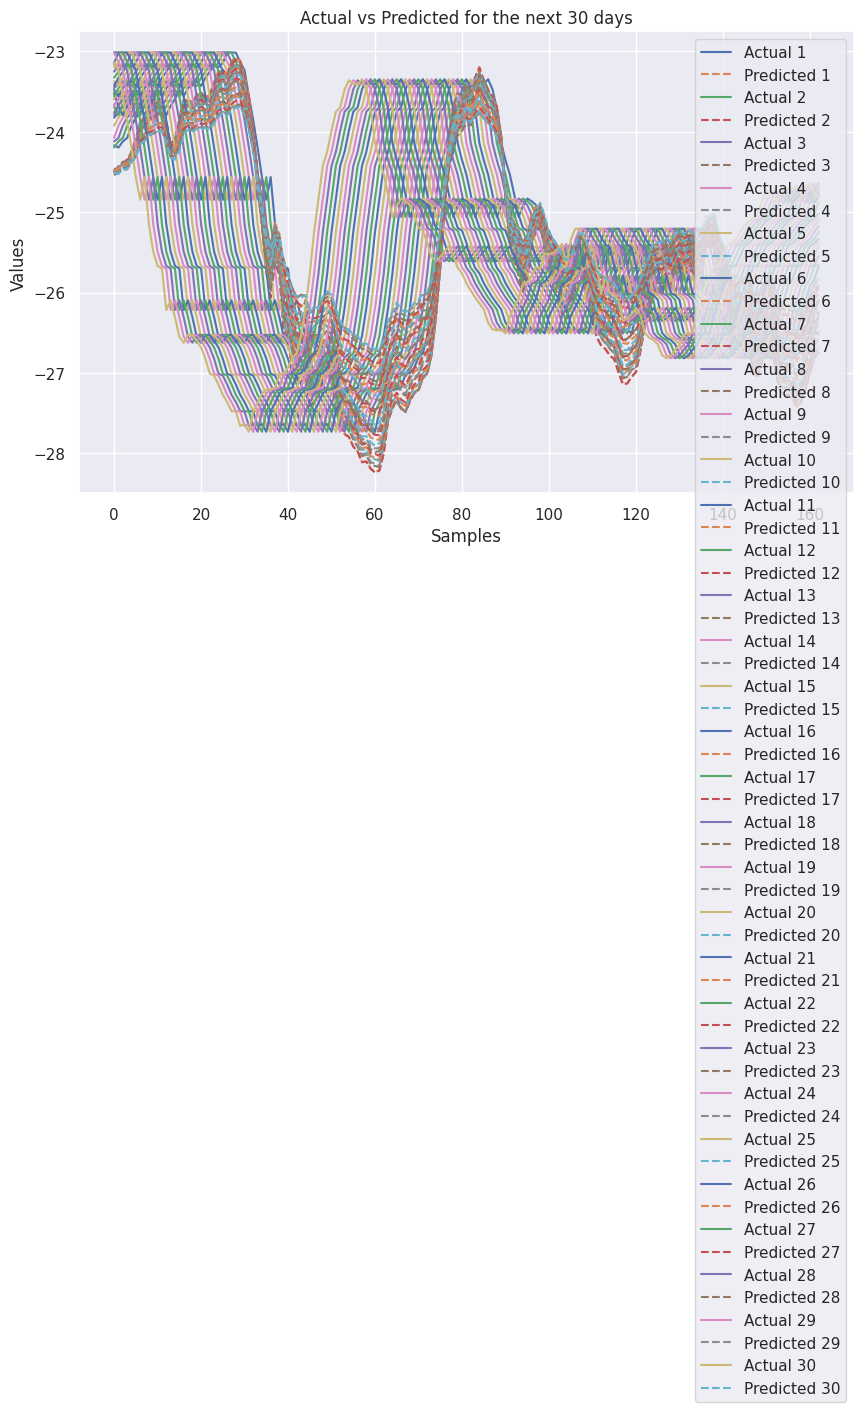

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Prepare the dataset
dataset = univariate_df['y'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size

train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(dataset), len(train), len(test))

def create_dataset(dataset, look_back, predict_steps):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - predict_steps):
        dataX.append(dataset[i:i + look_back, 0])
        dataY.append(dataset[i + look_back:i + look_back + predict_steps, 0])
    return np.array(dataX), np.array(dataY)

look_back = 5  # The number of previous time steps to consider for prediction
predict_steps = 30  # Number of steps to predict (next 30 days)

X_train, Y_train = create_dataset(train, look_back, predict_steps)
X_test, Y_test = create_dataset(test, look_back, predict_steps)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define the model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(predict_steps))  # Adjust output layer to predict multiple steps

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Define early stopping and checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

# Fit the model
history = model.fit(X_train, Y_train, epochs=200, verbose=2, batch_size=10, validation_data=(X_test, Y_test),
                    callbacks=[early_stopping, checkpoint])

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Save the model in the newer Keras format
model.save('lstm_model.keras')

# Load the model
loaded_model = load_model('lstm_model.keras')

# Make predictions (multi-step predictions for the next 30 days)
predictions = loaded_model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
Y_test_inv = scaler.inverse_transform(Y_test)

# Plot predictions
plt.figure(figsize=(10, 6))
for i in range(predict_steps):
    plt.plot(Y_test_inv[:, i], label=f'Actual {i+1}')
    plt.plot(predictions[:, i], label=f'Predicted {i+1}', linestyle='--')

plt.xlabel('Samples')
plt.ylabel('Values')
plt.title('Actual vs Predicted for the next 30 days')
plt.legend()
plt.show()
